In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from new_thesis_library import *
pd.options.display.max_rows = 999

In [2]:
bootstraped_rates_list = []

for i in range(len(dates)):
    bootstraped_rates_list.append(pd.read_csv(path + 'Data/New_data/Bootstraped_rates/bt_rates_' + str(dates[i].date()) + '.csv', index_col=0))

In [3]:
maturity_matrix = pd.read_csv(path + 'Data/New_data/bonds_maturities.csv', index_col='TRADEDATE', parse_dates=True)
irr_matrix = pd.read_csv(path + 'Data/New_data/bonds_irrs.csv', index_col='TRADEDATE', parse_dates=True)

In [4]:
moex_thetas = pd.read_csv(path + 'Data/New_data/moex_dynamic.csv',
                          sep = ';')

moex_thetas['tradedate'] = pd.to_datetime(moex_thetas['tradedate'], format='%d.%m.%Y')
moex_thetas[['B1', 'B2', 'B3', 'T1']] = moex_thetas[['B1', 'B2', 'B3', 'T1']].apply(lambda x: x.str.replace(',','.'))
moex_thetas[['B1', 'B2', 'B3', 'T1']] = moex_thetas[['B1', 'B2', 'B3', 'T1']].astype('float64')
moex_thetas[['B1', 'B2', 'B3']] = moex_thetas[['B1', 'B2', 'B3']]/10000
moex_thetas = moex_thetas[['tradedate', 'T1', 'B1', 'B2', 'B3']]
moex_thetas.set_index('tradedate', inplace = True)

## Best of random

In [5]:
bfgs_best_of_rand = pd.read_csv(path + 'Thetas/l_bfgs_b_best_of_rand.csv', index_col='TRADEDATE', parse_dates = True)
powell_best_of_rand = pd.read_csv(path + 'Thetas/powell_best_of_rand.csv', index_col='TRADEDATE', parse_dates = True)
nelder_mead_best_of_rand = pd.read_csv(path + 'Thetas/nelder_mead_best_of_rand.csv', index_col='TRADEDATE', parse_dates = True)
trust_constr_best_of_rand = pd.read_csv(path + 'Thetas/trust_constr_best_of_rand.csv', index_col='TRADEDATE', parse_dates = True)

## Recurrent

In [6]:
bfgs_recurrent_1 = pd.read_csv(path + 'Thetas/l_bfgs_b_recurrent.csv', index_col='TRADEDATE', parse_dates = True)
nelder_mead_recurrent_1 = pd.read_csv(path + 'Thetas/nelder_mead_recurrent.csv', index_col='TRADEDATE', parse_dates = True)
powell_recurrent_1 = pd.read_csv(path + 'Thetas/powell_recurrent.csv', index_col='TRADEDATE', parse_dates = True)
trust_constr_recurrent_1 = pd.read_csv(path + 'Thetas/trust_constr_recurrent.csv', index_col='TRADEDATE', parse_dates = True)

In [7]:
bfgs_recurrent_3 = pd.read_csv(path + 'Thetas_wihtout_3_month_data/l_bfgs_b_recurrent.csv', index_col='TRADEDATE', parse_dates = True)
nelder_mead_recurrent_3 = pd.read_csv(path + 'Thetas_wihtout_3_month_data/nelder_mead_recurrent.csv', index_col='TRADEDATE', parse_dates = True)
powell_recurrent_3 = pd.read_csv(path + 'Thetas_wihtout_3_month_data/powell_recurrent.csv', index_col='TRADEDATE', parse_dates = True)
trust_constr_recurrent_3 = pd.read_csv(path + 'Thetas_wihtout_3_month_data/trust_constr_recurrent.csv', index_col='TRADEDATE', parse_dates = True)

No signigicant improvement from throwing our bonds with maturity less than 3 months instead of 1. We will still throw up to 1.

# Manousopoulos

In [8]:
bfgs_manous = pd.read_csv(path + 'Thetas/l_bfgs_b_manousopoulos.csv', index_col='TRADEDATE', parse_dates = True)
nelder_mead_manous = pd.read_csv(path + 'Thetas/nelder_mead_manousopoulos.csv', index_col='TRADEDATE', parse_dates = True)
powell_manous = pd.read_csv(path + 'Thetas/powell_manousopoulos.csv', index_col='TRADEDATE', parse_dates = True)
trust_constr_manous = pd.read_csv(path + 'Thetas/trust_constr_manousopoulos.csv', index_col='TRADEDATE', parse_dates = True)

# Diebold Li

In [9]:
bfgs_dl = pd.read_csv(path + 'Thetas/l_bfgs_b_diebold_li.csv', index_col='TRADEDATE', parse_dates = True)
nelder_mead_dl = pd.read_csv(path + 'Thetas/nelder_mead_diebold_li.csv', index_col='TRADEDATE', parse_dates = True)
powell_dl = pd.read_csv(path + 'Thetas/powell_diebold_li.csv', index_col='TRADEDATE', parse_dates = True)
trust_constr_dl = pd.read_csv(path + 'Thetas/trust_constr_diebold_li.csv', index_col='TRADEDATE', parse_dates = True)

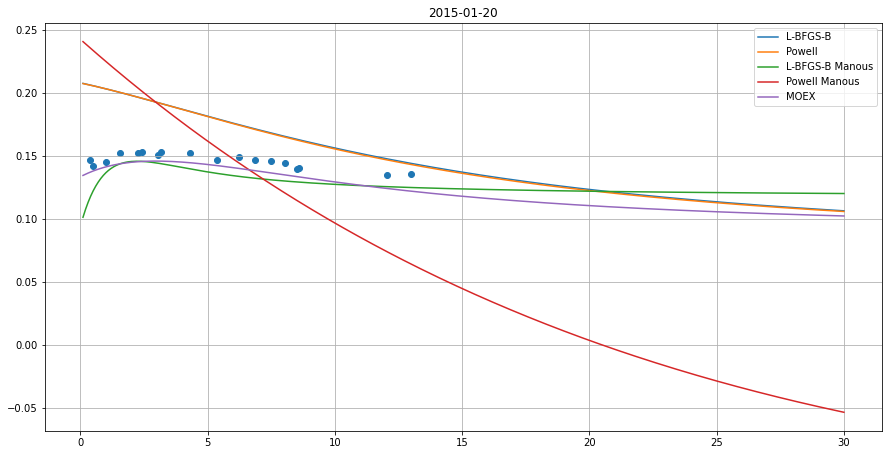

In [11]:
i = 257

m = np.linspace(0.1, 30, 300)
plt.figure(figsize = (15, 7.5))
plt.title(dates[i].date())
plt.plot(m, ns(m, bfgs_recurrent_1[dates[i]:dates[i]].values[0]), label = 'L-BFGS-B')
#plt.plot(m, ns(m, nelder_mead_recurrent_1[dates[i]:dates[i]].values[0]), label = 'Nelder-Mead')
plt.plot(m, ns(m, powell_recurrent_1[dates[i]:dates[i]].values[0]), label = 'Powell')
#plt.plot(m, ns(m, trust_constr_recurrent_1[dates[i]:dates[i]].values[0]), label = 'Trust Constr')
plt.plot(m, ns(m, bfgs_manous[dates[i]:dates[i]].values[0]), label = 'L-BFGS-B Manous')
#plt.plot(m, ns(m, nelder_mead_recurrent_3[dates[i]:dates[i]].values[0]), label = 'Nelder-Mead')
plt.plot(m, ns(m, powell_manous[dates[i]:dates[i]].values[0]), label = 'Powell Manous')
#plt.plot(m, ns(m, trust_constr_recurrent_3[dates[i]:dates[i]].values[0]), label = 'Trust Constr')
plt.plot(m, ns(m, moex_thetas[dates[i]:dates[i]].values[0]), label = 'MOEX')
plt.scatter(maturity_matrix[dates[i]:dates[i]], irr_matrix[dates[i]:dates[i]])
plt.grid()
plt.legend()
#plt.scatter(maturity_matrix[dates[i]:dates[i]], irr_matrix[dates[i]:dates[i]])

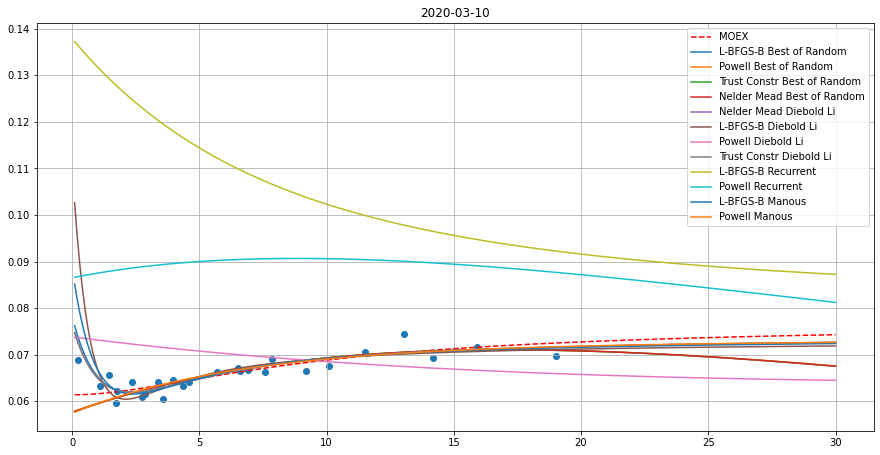

In [20]:
i = 1550

m = np.linspace(0.1, 30, 300)
plt.figure(figsize = (15, 7.5))
plt.title(dates[i].date())

plt.plot(m, ns(m, moex_thetas[dates[i]:dates[i]].values[0]), 'r--', label = 'MOEX')

plt.plot(m, ns(m, bfgs_best_of_rand[dates[i]:dates[i]].values[0]), label = 'L-BFGS-B Best of Random')
plt.plot(m, ns(m, powell_best_of_rand[dates[i]:dates[i]].values[0]), label = 'Powell Best of Random')
plt.plot(m, ns(m, trust_constr_best_of_rand[dates[i]:dates[i]].values[0]), label = 'Trust Constr Best of Random')
plt.plot(m, ns(m, nelder_mead_best_of_rand[dates[i]:dates[i]].values[0]), label = 'Nelder Mead Best of Random')

plt.plot(m, ns(m, nelder_mead_dl[dates[i]:dates[i]].values[0]), label = 'Nelder Mead Diebold Li')
plt.plot(m, ns(m, bfgs_dl[dates[i]:dates[i]].values[0]), label = 'L-BFGS-B Diebold Li')
plt.plot(m, ns(m, powell_dl[dates[i]:dates[i]].values[0]), label = 'Powell Diebold Li')
plt.plot(m, ns(m, trust_constr_dl[dates[i]:dates[i]].values[0]), label = 'Trust Constr Diebold Li')


plt.plot(m, ns(m, bfgs_recurrent_1[dates[i]:dates[i]].values[0]), label = 'L-BFGS-B Recurrent')
#plt.plot(m, ns(m, nelder_mead_recurrent_1[dates[i]:dates[i]].values[0]), label = 'Nelder-Mead')
plt.plot(m, ns(m, powell_recurrent_1[dates[i]:dates[i]].values[0]), label = 'Powell Recurrent')
#plt.plot(m, ns(m, trust_constr_recurrent_1[dates[i]:dates[i]].values[0]), label = 'Trust Constr')
plt.plot(m, ns(m, bfgs_manous[dates[i]:dates[i]].values[0]), label = 'L-BFGS-B Manous')
#plt.plot(m, ns(m, nelder_mead_recurrent_3[dates[i]:dates[i]].values[0]), label = 'Nelder-Mead')
plt.plot(m, ns(m, powell_manous[dates[i]:dates[i]].values[0]), label = 'Powell Manous')
#plt.plot(m, ns(m, trust_constr_recurrent_3[dates[i]:dates[i]].values[0]), label = 'Trust Constr')

plt.scatter(bootstraped_rates_list[i].maturity, bootstraped_rates_list[i].rates)
#plt.ylim(0.06,0.11)
plt.grid()
plt.legend()
#plt.scatter(maturity_matrix[dates[i]:dates[i]], irr_matrix[dates[i]:dates[i]])